In [29]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Load and Prepare data for modeling 

In [220]:
data = pd.read_csv('Food_Delivery_Times.csv')
data.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

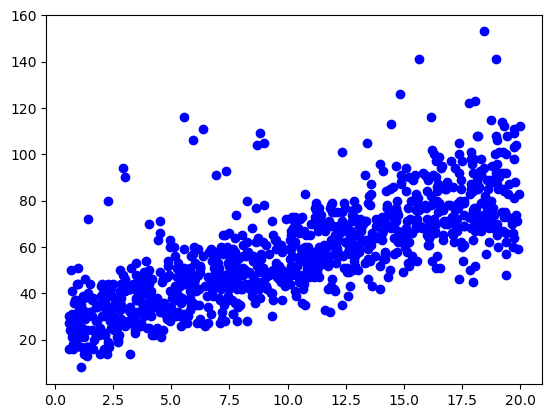

In [188]:
plt.scatter(data['Distance_km'], data['Delivery_Time_min'], color ='blue', label='Flipper vs Body Mass')
plt.show()


            

In [192]:
data.dropna()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [234]:
data = pd.get_dummies(data, drop_first=True)
# data = data.drop(columns='Order_ID')
for col in data.select_dtypes(include=['bool']):
    data[col] = data[col].astype(int)
data

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_High,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,1.0,43,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
1,16.42,20,2.0,84,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
2,9.52,28,1.0,59,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
3,7.44,5,1.0,37,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
4,19.03,16,5.0,68,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.50,13,3.0,54,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
996,16.28,8,9.0,71,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
997,15.62,26,2.0,81,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
998,14.17,8,0.0,55,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [132]:
X = data[['Preparation_Time_min', 'Distance_km']] # Use double brackets for 2D structure
Y = data['Delivery_Time_min']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


print("Training Features:\n", X_train)
print("Testing Features:\n", X_test)
print("Training Labels:\n", Y_train)
print("Testing Labels:\n", Y_test)
# Splitting the data 

Training Features:
      Preparation_Time_min  Distance_km
29                     10        18.05
535                    18         2.14
695                    17         3.23
557                    27         7.51
836                     8         4.62
..                    ...          ...
106                    24        17.59
270                    14         9.39
860                     6        16.38
435                     9        16.73
102                    21         0.86

[800 rows x 2 columns]
Testing Features:
      Preparation_Time_min  Distance_km
521                    16         5.30
737                    25        10.46
740                    14         4.04
660                    24         3.33
411                    23        17.44
..                    ...          ...
408                    23        15.62
332                    14         1.80
208                    25         7.39
613                     6         9.70
78                     23         3.46



<Axes: >

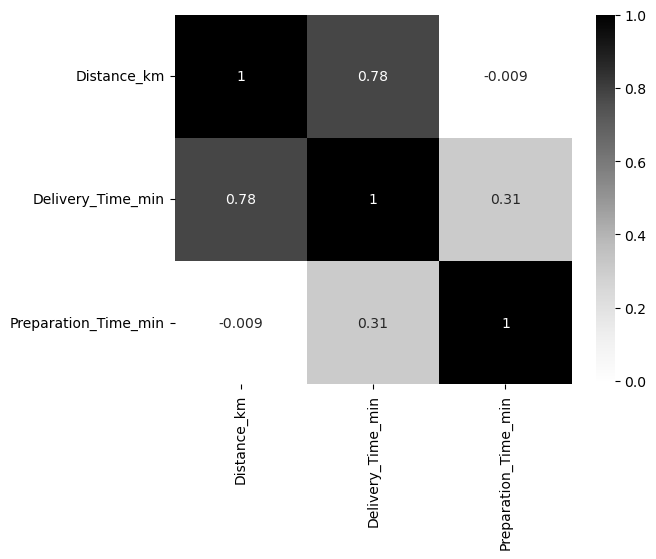

In [136]:
correlation_matrix = data[['Distance_km', 'Delivery_Time_min', 'Preparation_Time_min']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Grays', cbar=True)

### Training fitting the data 

In [184]:

# Initialize and fit the model
sr = LinearRegression()
sr.fit(X_train, Y_train)

# Make predictions
Y_hat = sr.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(Y_test, Y_hat))
print("R2 Score:", r2_score(Y_test, Y_hat))

Mean Squared Error: 120.43753932898674
R2 Score: 0.731302340005336


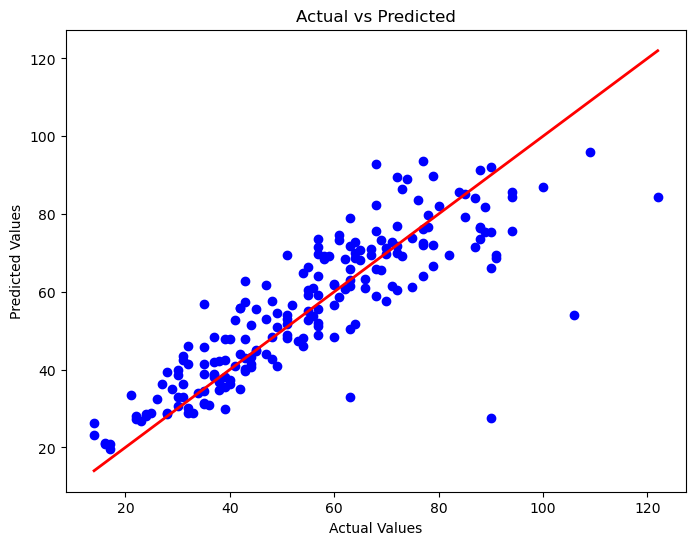

In [154]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_hat, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


In [174]:
distance = 20
preparation_time = 20

distance_df = pd.DataFrame([[preparation_time, distance]], columns=['Preparation_Time_min', 'Distance_km'])
predicted_time = sr.predict(distance_df)

predicted_time

array([89.99610783])

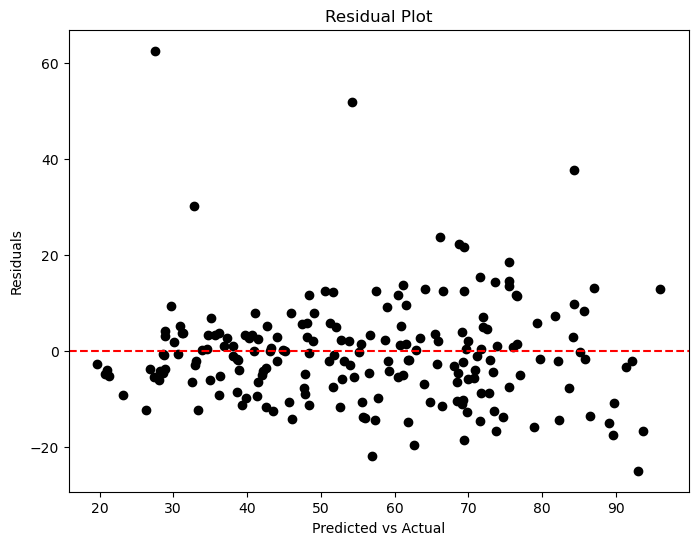

In [182]:
residuals = Y_test - Y_hat
plt.figure(figsize=(8, 6))
plt.scatter(Y_hat, residuals, color='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted vs Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()